# Conocimiento de código

## Librerías y funciones

In [94]:
import pandas as pd
import numpy as np
import os
from IPython.display import clear_output
import matplotlib.pyplot as plt
import seaborn as sns



def ver_Nan(df,columns):
    for column in columns:
        text = f'NaN? - {column.upper()} '
        
        isNa = df[column].isna().any()
        print(f'{text.ljust(50)} {isNa}')



## Lectura de datos

Vamos a primero comprender los disntintos datasets que nos han facilitado el concurso. Para ello, vamos a cargar los datos y a ver qué información contienen.

In [64]:
directorio = '../apau-smog-prediction/'
lista = os.listdir(directorio)
for i in lista:
    exec(i.split('.')[0] + ' = pd.read_csv(directorio + i)')


- sample_subsimmision, ejemplo de cómo debe ser el fichero de salida (la predicción)
- test_nolabel, datos de test sin etiquetar (podemos observar que no tenemos la columna de la etiqueta -Smog-)
- train, datos de entrenamiento 



In [65]:
sample_submission.head()

,id,Predicted
0,2be023f9102,2
1,a320ba7de7b,3
2,2879e8fa078,0
3,a561b6ee65b,2
4,94c225dd8e9,1


In [66]:
test_nolabel.head()

,id,Model Year,Make,Model,Vehicle Class,Engine Size (L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km)
0,2be023f9102,2022,Jeep,Wagoneer 4X4,SUV: Standard,5.7,8,A8,X,15.6,11.7,13.8,20,323
1,a320ba7de7b,2022,Porsche,718 Boxster,Two-seater,2.0,4,M6,Z,11.7,8.9,10.5,27,245
2,2879e8fa078,2022,Chrysler,Grand Caravan,Minivan,3.6,6,A9,X,12.4,8.4,10.6,27,249
3,a561b6ee65b,2022,Kia,Sorento AWD,SUV: Small,2.5,4,AM8,X,10.9,8.7,9.9,29,234
4,94c225dd8e9,2022,Bentley,Continental GT,Subcompact,4.0,8,AM8,Z,14.9,9.0,12.2,23,287


In [67]:
train.head()

,id,Model Year,Make,Model,Vehicle Class,Engine Size (L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km),Smog
0,ab44e9bec15,2022,Mercedes-Benz,A 250 4MATIC Hatch,Station wagon: Small,2.0,4,AM7,Z,10.0,7.0,8.7,32,202,2
1,45926762371,2022,Mazda,Mazda3 5-Door,Mid-size,2.0,4,AS6,X,8.6,6.7,7.7,37,181,4
2,e9be56e153f,2022,Porsche,Panamera 4 ST,Full-size,2.9,6,AM8,Z,12.8,10.2,11.7,24,274,2
3,077092760df,2022,Mazda,CX-3 4WD,Compact,2.0,4,AS6,X,8.6,7.4,8.1,35,189,1
4,c1c2579b795,2022,Aston Martin,DBS V12,Minicompact,5.2,12,A8,Z,16.4,10.7,13.8,20,324,1


## Limpieza de datos

### 1. Encontrar valores nulos y estudiar si se pueden eliminar o rellenar con algún valor

In [69]:
train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                586 non-null    object 
 1   Model Year                        586 non-null    int64  
 2   Make                              586 non-null    object 
 3   Model                             586 non-null    object 
 4   Vehicle Class                     586 non-null    object 
 5   Engine Size (L)                   586 non-null    float64
 6   Cylinders                         586 non-null    int64  
 7   Transmission                      586 non-null    object 
 8   Fuel Type                         586 non-null    object 
 9   Fuel Consumption City (L/100 km)  586 non-null    float64
 10  Hwy (L/100 km)                    586 non-null    float64
 11  Comb (L/100 km)                   586 non-null    float64
 12  Comb (mp

In [70]:
test_nolabel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                390 non-null    object 
 1   Model Year                        390 non-null    int64  
 2   Make                              390 non-null    object 
 3   Model                             390 non-null    object 
 4   Vehicle Class                     390 non-null    object 
 5   Engine Size (L)                   390 non-null    float64
 6   Cylinders                         390 non-null    int64  
 7   Transmission                      390 non-null    object 
 8   Fuel Type                         390 non-null    object 
 9   Fuel Consumption City (L/100 km)  390 non-null    float64
 10  Hwy (L/100 km)                    390 non-null    float64
 11  Comb (L/100 km)                   390 non-null    float64
 12  Comb (mp

In [85]:
#escalamos datos de train unicamente los que no sean string
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
string = train.select_dtypes(include=['object']).columns

train_no_string = train.drop(string,axis=1)
train_no_string = scaler.fit_transform(train_no_string)
train_no_string = pd.DataFrame(train_no_string,columns=train.drop(string,axis=1).columns)
#sustituir una columna por otra ejemplo quiero sustituir todas las columnas de train que no son string por las escaladas


#las columnas con string las quiero e un array llamado string




(array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(1, 0, 'Model Year'),
  Text(2, 0, 'Engine Size (L)'),
  Text(3, 0, 'Cylinders'),
  Text(4, 0, 'Fuel Consumption City (L/100 km)'),
  Text(5, 0, 'Hwy (L/100 km)'),
  Text(6, 0, 'Comb (L/100 km)'),
  Text(7, 0, 'Comb (mpg)'),
  Text(8, 0, 'CO2 Emissions (g/km)'),
  Text(9, 0, 'Smog')])

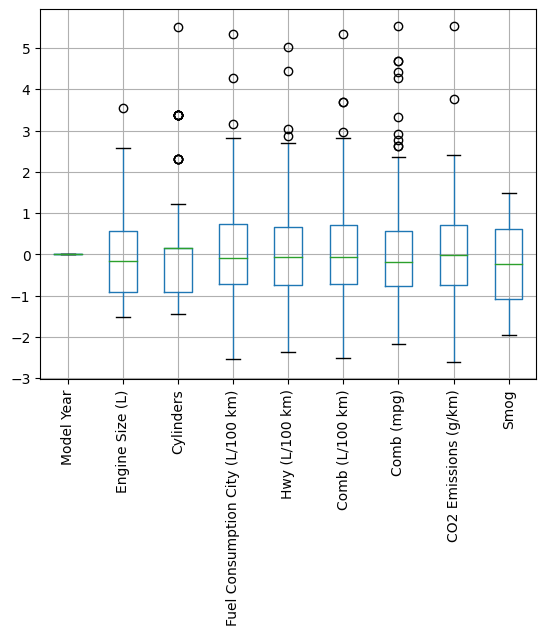

In [90]:
train_escaled.boxplot()
#quiero que se vean los nombres de las columnas en el boxplot y no se junten
plt.xticks(rotation=90)

In [268]:
def standard_scale(df):
    '''Devuelve un dataframe con las columnas escaladas'''
    scaler = StandardScaler()
    string = df.select_dtypes(include=['object']).columns #solo vamos a escalar las columnas que no son string
    df_no_string = df.drop(string,axis=1)
    df_no_string = scaler.fit_transform(df_no_string)
    df_no_string = pd.DataFrame(df_no_string,columns=df.drop(string,axis=1).columns)
    df_escaled = df.copy()
    df_escaled[df_no_string.columns] = df_no_string
    return df_escaled

def boxplot(df):
    '''Devuelve un boxplot de df'''
    df_escaled = standard_scale(df)
    sns.boxplot(data=df_escaled,orient='h')

def rango_outliers(df):
    '''Devuelve el rango de outliers de df, definidas por min y max'''
    df_escaled = standard_scale(df)
    Q1 = df_escaled.quantile(0.25)
    Q3 = df_escaled.quantile(0.75)
    IQR = Q3 - Q1
    min = Q1 - 1.5*IQR
    max = Q3 + 1.5*IQR
    return min,max

def outliers(df):
    '''Devuelve un dataframe con los outliers de df, y una columna llamada outliers con las columnas que son outliers'''
    df_escaled = standard_scale(df)
    min,max = rango_outliers(df)
    columnas_no_string = df.select_dtypes(exclude=['object']).columns
    premisa = (df_escaled[columnas_no_string] < min) | (df_escaled[columnas_no_string] > max)
    indexes = df_escaled[premisa].dropna(axis=0,how='all').index
    df_outliers_bool = df_escaled[premisa].dropna(axis=0,how='all').isna()
    df_outliers = df.loc[indexes]
    columnas = df_outliers.columns
    dict = {i:[j for j in columnas if df_outliers_bool.loc[i][j] == False] for i in indexes}
    df_outliers['outliers'] = dict.values()
    return df_outliers




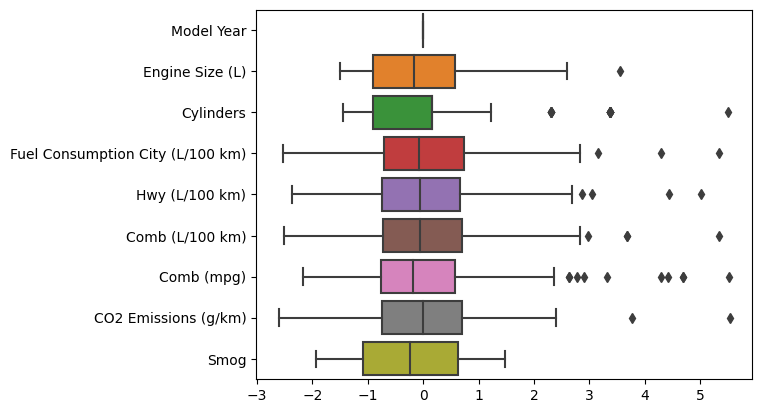

In [272]:
boxplot(train)#hola

In [274]:


# Compute the correlation matrix
corr = train.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))



# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
#sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            #square=True, linewidths=.5, cbar_kws={"shrink": .5})
    

corr


,Model Year,Engine Size (L),Cylinders,Fuel Consumption City (L/100 km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km),Smog
Model Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine Size (L),NaN,1.000000,0.916857,0.823824,0.722882,0.802054,-0.713731,0.808957,-0.385252
Cylinders,NaN,0.916857,1.000000,0.836961,0.716359,0.808126,-0.709976,0.819685,-0.452239
Fuel Consumption City (L/100 km),NaN,0.823824,0.836961,1.000000,0.917850,0.989132,-0.925557,0.962071,-0.485874
Hwy (L/100 km),NaN,0.722882,0.716359,0.917850,1.000000,0.966028,-0.888538,0.933776,-0.374793
Comb (L/100 km),NaN,0.802054,0.808126,0.989132,0.966028,1.000000,-0.930041,0.970278,-0.454922
Comb (mpg),NaN,-0.713731,-0.709976,-0.925557,-0.888538,-0.930041,1.000000,-0.926047,0.475578
CO2 Emissions (g/km),NaN,0.808957,0.819685,0.962071,0.933776,0.970278,-0.926047,1.000000,-0.481380
Smog,NaN,-0.385252,-0.452239,-0.485874,-0.374793,-0.454922,0.475578,-0.481380,1.000000


In [275]:
print (train[['Fuel Consumption City (L/100 km)', 'Hwy (L/100 km)']].corrwith(train['Comb (L/100 km)']))

Fuel Consumption City (L/100 km)    0.989132
Hwy (L/100 km)                      0.966028
dtype: float64


"'Figure' object is not subscriptable se debe a que no se puede acceder a un elemento de un objeto figure, entonces como se hace?\n"

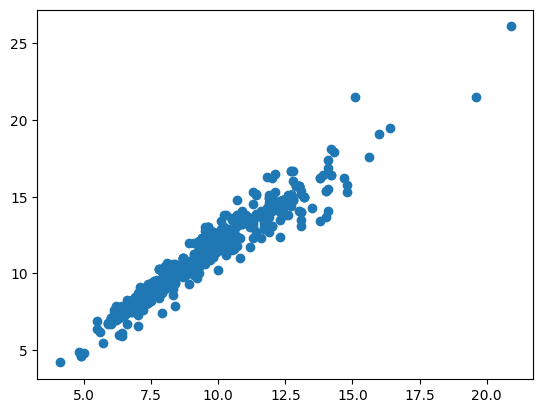

In [302]:
plt.scatter(train['Hwy (L/100 km)'],train['Comb (L/100 km)'])

def plot_scatter(df,columna):
    '''Devuelve un scatter plot de las columnas de df'''
    columnas = df.select_dtypes(exclude=['object']).columns
    for i in columnas:
        plt.scatter(df[i],df[columna])
        plt.xlabel(i)
        plt.ylabel(columna)
        plt.show()
        

''''Figure' object is not subscriptable se debe a que no se puede acceder a un elemento de un objeto figure, entonces como se hace?
'''

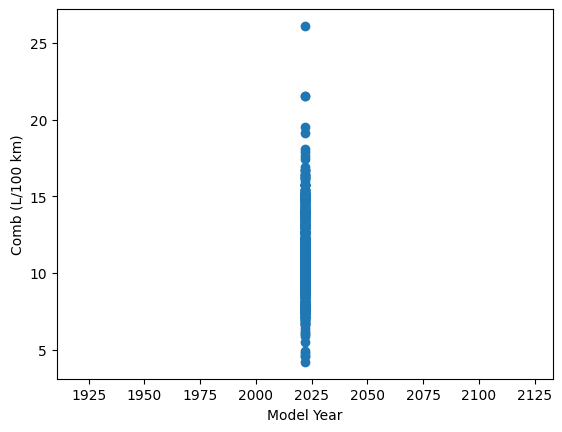

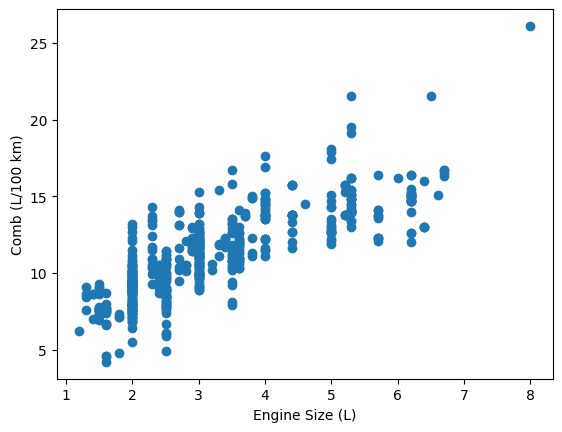

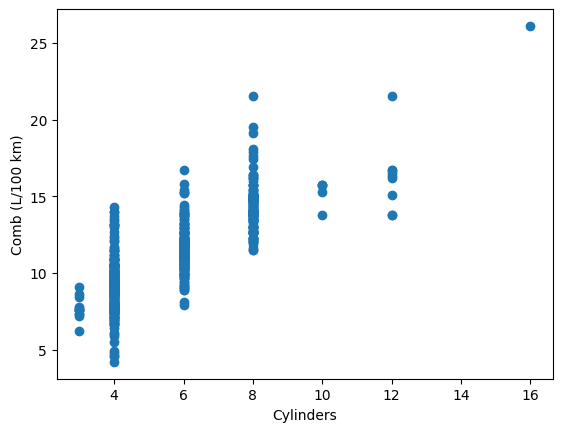

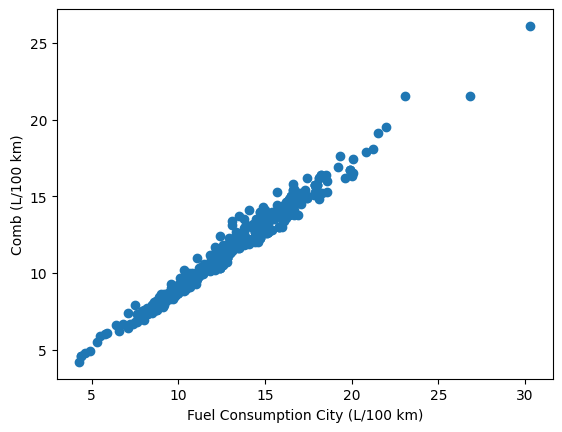

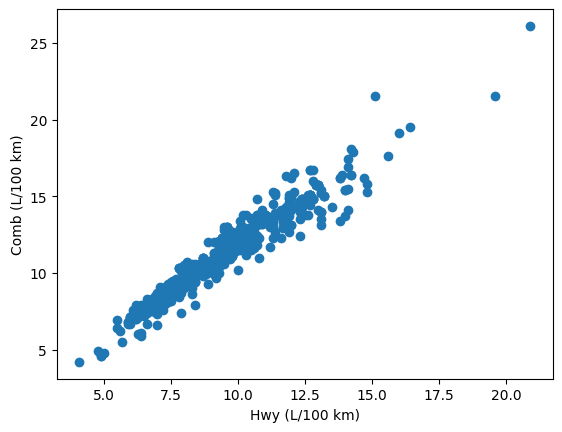

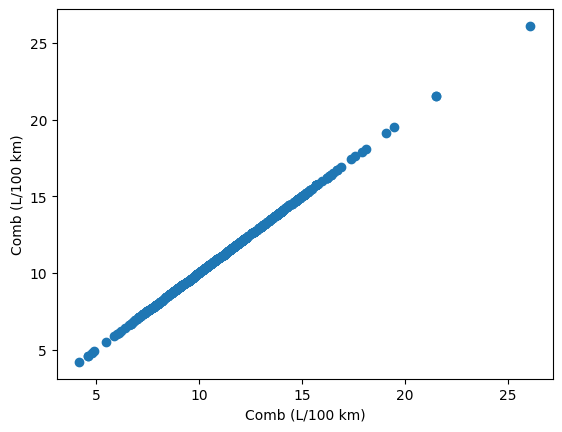

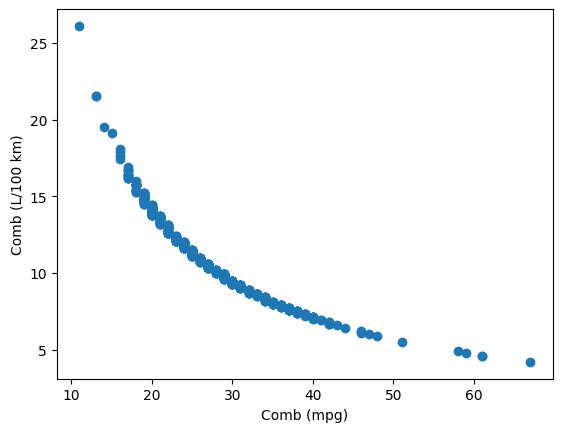

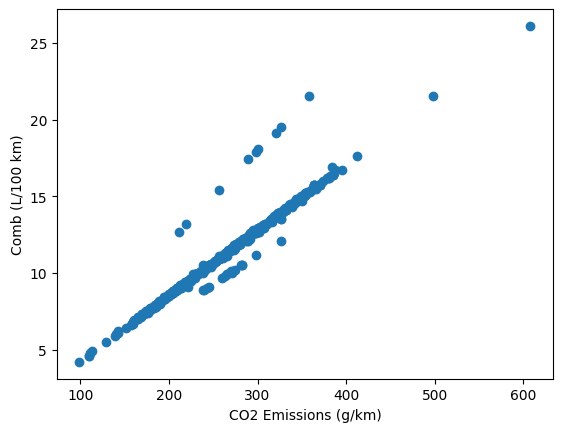

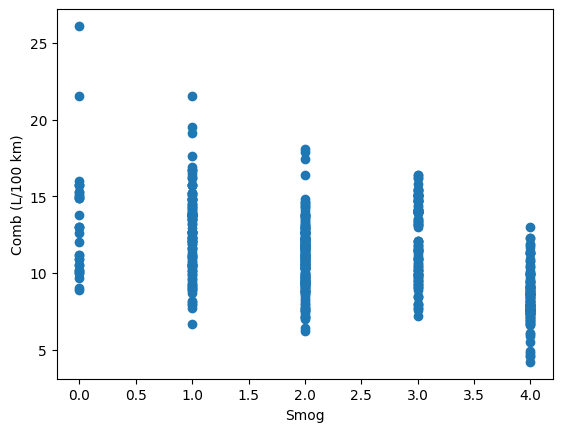

In [303]:
plot_scatter(train,'Comb (L/100 km)')

In [304]:
#Comb (mpg) y Comb (L/100 km) 
#mpg = 235.215/ L/100km
train

,id,Model Year,Make,Model,Vehicle Class,Engine Size (L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km),outliers
8,4d5f701cdde,2022,Audi,R8 Spyder Performance quattro,Two-seater,5.2,10,AM7,Z,17.9,12.1,15.3,18,356,[Cylinders]
9,76f30120e22,2022,GMC,Yukon XL 4WD (No Stop-Start),SUV: Standard,6.2,8,A10,Z,17.0,12.7,15.1,19,353,[Engine Size (L)]
11,dd33a84c757,2022,Chevrolet,Silverado 4WD,Pickup truck: Standard,6.2,8,A10,Z,15.7,11.9,14.0,20,329,[Engine Size (L)]
26,1796e50351e,2022,Chevrolet,Suburban 4WD (No Stop-Start),SUV: Standard,6.2,8,A10,Z,17.0,12.7,15.1,19,353,[Engine Size (L)]
35,11f073fbf9c,2022,Hyundai,IONIQ Blue,Full-size,1.6,4,AM6,X,4.0,3.9,4.0,71,94,"[Fuel Consumption City (L/100 km), Comb (mpg),..."
36,1ab4b8ae832,2022,Ford,Escape Hybrid,SUV: Small,2.5,4,AV,X,5.4,6.3,5.8,49,136,[Comb (mpg)]
43,cb4afc35d21,2022,Dodge,Challenger SRT Hellcat,Mid-size,6.2,8,A8,Z,17.6,10.7,14.5,19,339,[Engine Size (L)]
52,e0bd5de4641,2022,Mercedes-Benz,Maybach S 680 4MATIC Sedan,Full-size,6.0,12,A9,Z,19.4,11.2,15.7,18,369,[Cylinders]
63,eb98a3e05d1,2022,Bugatti,Chiron,Two-seater,8.0,16,AM7,Z,26.8,16.6,22.2,13,522,"[Engine Size (L), Cylinders, Fuel Consumption ..."
77,daa8a76141d,2022,Bentley,Bentayga Speed,SUV: Standard,6.0,12,AS8,Z,19.0,13.0,16.3,17,383,[Cylinders]


In [129]:
min,max = rango_outliers(train)

In [183]:

train_escaled[train_escaled > max ].dropna(axis=0,how='all')   
#quiero que no solo me salgan los outilers sino que me salga la fila entera
#quiero que me salga la fila entera y no solo los outliers



C:\Users\andre\AppData\Local\Temp\ipykernel_12060\2571518841.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  train_escaled[train_escaled > max ].dropna(axis=0,how='all')
C:\Users\andre\AppData\Local\Temp\ipykernel_12060\2571518841.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  indexes = train_escaled[train_escaled > max ].dropna(axis=0,how='all').index
C:\Users\andre\AppData\Local\Temp\ipykernel_12060\2571518841.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  prue

In [184]:
prueba

,id,Model Year,Make,Model,Vehicle Class,Engine Size (L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km),Smog,outliers
4,c1c2579b795,0.0,Aston Martin,DBS V12,Minicompact,1.470777,3.367684,A8,Z,1.135162,0.535633,0.924065,-0.937241,0.988501,-1.086823,[Cylinders]
34,4ee8ba5a71b,0.0,Lamborghini,Huracan evo Spyder,Two-seater,1.470777,2.299504,AM7,Z,1.619587,1.501962,1.605742,-1.212058,1.740103,-1.941692,[Cylinders]
55,fbbcebc9b93,0.0,Kia,Niro FE,Station wagon: Small,-1.210712,-0.905037,AM6,X,-2.498019,-2.011961,-2.376684,4.696521,-2.433689,1.477787,[Comb (mpg)]
68,2900c2e6b2a,0.0,Audi,R8 Spyder Performance,Two-seater,1.470777,2.299504,AM7,Z,1.225992,0.359937,0.924065,-0.937241,0.956518,-1.941692,[Cylinders]
69,19419706fbd,0.0,Audi,R8 Coupe Performance quattro,Two-seater,1.470777,2.299504,AM7,Z,1.589310,1.150570,1.462231,-1.212058,1.500230,-1.941692,[Cylinders]
76,f60ce250af3,0.0,BMW,M760i xDrive Sedan,Full-size,2.513578,3.367684,AS8,Z,1.559034,1.062722,1.390476,-1.074650,1.468247,-1.086823,[Cylinders]
128,990ee624b73,0.0,Bentley,Continental GT Speed,Subcompact,2.066663,3.367684,AM8,Z,2.104011,1.106646,1.785130,-1.349467,1.868036,-1.086823,[Cylinders]
195,2fdeb57c0d9,0.0,Lamborghini,Aventador Ultimae Roadster,Two-seater,2.439092,3.367684,AM7,Z,4.283919,2.468291,3.686649,-1.899103,3.771029,-1.941692,"[Cylinders, Fuel Consumption City (L/100 km), ..."
197,e38433dd427,0.0,Aston Martin,DB11 V12,Minicompact,1.470777,3.367684,A8,Z,1.135162,0.535633,0.924065,-0.937241,0.988501,-1.086823,[Cylinders]
207,1318a48abac,0.0,Ford,Escape Hybrid AWD,SUV: Small,-0.540340,-0.905037,AV,X,-2.164977,-1.353100,-1.910274,2.910206,-1.969934,1.477787,[Comb (mpg)]


In [133]:
max['Smog']

3.1875264858593844

In [148]:
outliers(train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                0 non-null      object 
 1   Model Year                        0 non-null      float64
 2   Make                              0 non-null      object 
 3   Model                             0 non-null      object 
 4   Vehicle Class                     0 non-null      object 
 5   Engine Size (L)                   0 non-null      float64
 6   Cylinders                         0 non-null      float64
 7   Transmission                      0 non-null      object 
 8   Fuel Type                         0 non-null      object 
 9   Fuel Consumption City (L/100 km)  0 non-null      float64
 10  Hwy (L/100 km)                    0 non-null      float64
 11  Comb (L/100 km)                   0 non-null      float64
 12  Comb (mp

C:\Users\andre\AppData\Local\Temp\ipykernel_12060\2646902563.py:30: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_outliers = df_outliers[df_outliers < min ]


Vemos que no hay un valor NaN en todo el dataset, por lo que no es necesario rellenar ningún dato.

Ahora, visualicemos con histogramas todos los datos que sean numéricos:

### 2. Estudio de las distintas variables

In [9]:
train.columns

Index(['id', 'Model Year', 'Make', 'Model', 'Vehicle Class', 'Engine Size (L)',
       'Cylinders', 'Transmission', 'Fuel Type',
       'Fuel Consumption City (L/100 km)', 'Hwy (L/100 km)', 'Comb (L/100 km)',
       'Comb (mpg)', 'CO2 Emissions (g/km)', 'Smog'],
      dtype='object')

Nuestras variables son:
- Model Year: año del modelo
- Make: marca del coche
- Model: modelo del coche
- Vehicle Class: clase del vehículo
- Engine Size: tamaño del motor
- Cylinders: número de cilindros
- Transmission: tipo de transmisión
- Fuel Type: tipo de combustible
- Fuel Consumption City (L/100 km): consumo de combustible en ciudad
- Hwy (L/100 km): consumo de combustible en carretera
- Comb (L/100 km): consumo de combustible combinado
- Fuel Consumption Comb (mpg): consumo de combustible combinado (millas por galón)
- CO2 Emissions(g/km): emisiones de CO2

Vamos a estudiar cada una de las variables para ver si podemos sacar alguna conclusión sobre ellas.


#### Model Year: año del modelo

In [10]:
train['Model Year'].head()

0    2022
1    2022
2    2022
3    2022
4    2022
Name: Model Year, dtype: int64

In [11]:
train['Model Year'].unique()


array([2022], dtype=int64)

In [12]:
train = train.drop(['Model Year'],axis=1)

Observamos que la variable Model Year tiene como valor único el año 2020, por lo que no nos aporta información. Por tanto, la eliminamos.

#### Make, Model, Vehicle Class: marca, modelo y clase del vehículo

Vamos a ver si podemos sacar alguna conclusión sobre estas variables. Para ello, vamos a observar si con alguna de las dos variables podemos saber
la otra variable. Por ejemplo, si con la marca y el modelo podemos saber la clase del vehículo, no sería necesario tener las tres variables.

In [13]:
estudio=train.iloc[:,1:4]
estudio.head()

,Make,Model,Vehicle Class
0,Mercedes-Benz,A 250 4MATIC Hatch,Station wagon: Small
1,Mazda,Mazda3 5-Door,Mid-size
2,Porsche,Panamera 4 ST,Full-size
3,Mazda,CX-3 4WD,Compact
4,Aston Martin,DBS V12,Minicompact


In [14]:
assert (estudio[['Model','Vehicle Class']].value_counts()!=1).any()
assert (estudio[['Make','Vehicle Class']].value_counts()!=1).any()
assert (estudio[['Make','Model']].value_counts()!=1).any()

In [15]:
(train.groupby(['Make','Model']).count()==1).any()
#encuentra la fila que hace que lo dearriba no sea tru
#encuntra si hay dupplicados en make y model
train[train.duplicated(subset=['Engine Size (L)','Cylinders'],keep=False)].sort_values(by=['Make','Model'])

dumies = pd.get_dummies(train,columns=['Make','Model','Vehicle Class','Transmission'],drop_first=True)

In [16]:
corr = train.iloc[4:,:].corr(method='pearson')

corr.style.background_gradient(cmap='coolwarm', axis=None)





,Engine Size (L),Cylinders,Fuel Consumption City (L/100 km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km),Smog
Engine Size (L),1.000000,0.916637,0.823131,0.721784,0.801275,-0.712760,0.808221,-0.387098
Cylinders,0.916637,1.000000,0.836298,0.715005,0.807255,-0.708713,0.818873,-0.454243
Fuel Consumption City (L/100 km),0.823131,0.836298,1.000000,0.917553,0.989096,-0.925216,0.961866,-0.488333
Hwy (L/100 km),0.721784,0.715005,0.917553,1.000000,0.965899,-0.888011,0.933429,-0.375993
Comb (L/100 km),0.801275,0.807255,0.989096,0.965899,1.000000,-0.929672,0.970086,-0.456908
Comb (mpg),-0.712760,-0.708713,-0.925216,-0.888011,-0.929672,1.000000,-0.925642,0.477262
CO2 Emissions (g/km),0.808221,0.818873,0.961866,0.933429,0.970086,-0.925642,1.000000,-0.483682
Smog,-0.387098,-0.454243,-0.488333,-0.375993,-0.456908,0.477262,-0.483682,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                586 non-null    object 
 1   Make                              586 non-null    object 
 2   Model                             586 non-null    object 
 3   Vehicle Class                     586 non-null    object 
 4   Engine Size (L)                   586 non-null    float64
 5   Cylinders                         586 non-null    int64  
 6   Transmission                      586 non-null    object 
 7   Fuel Type                         586 non-null    object 
 8   Fuel Consumption City (L/100 km)  586 non-null    float64
 9   Hwy (L/100 km)                    586 non-null    float64
 10  Comb (L/100 km)                   586 non-null    float64
 11  Comb (mpg)                        586 non-null    int64  
 12  CO2 Emis

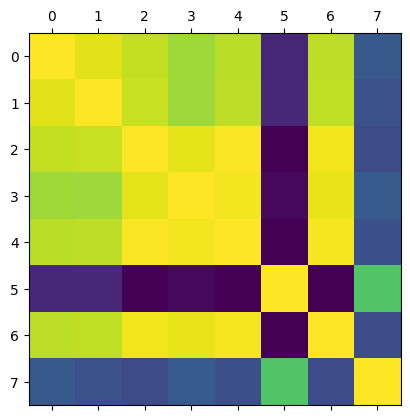

In [17]:
plt.matshow(corr)
train.info()

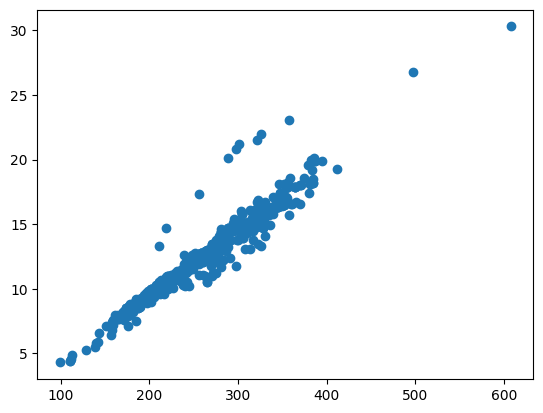

In [18]:
#plt.plot(train['CO2 Emissions (g/km)'],train['Comb (mpg)'])
#ahora representame su linea de regresion

plt.scatter(train['CO2 Emissions (g/km)'],train['Fuel Consumption City (L/100 km)'])

#quiero el plot de todas las columnas con todas las columnas
#como son 8 columnas, 8x8 = 64 plots


In [19]:
#una correlacion alta entre variables puede afectar a la prediccion ya que puede haber una relacion lineal entre ellas y al haber
#una relacion lineal entre ellas puede afectar a la prediccion, debido a que si hay una relacion lineal entre ellas, una de ellas
#un valor alto seria de 0,

Con los asserts podemos ver que no es posible saber la clase del vehículo con la marca y el modelo, por lo que las tres variables son necesarias 
(por ahora).

#### Engine Size, Cylinders y Transmission

Hemos agrupado estas tres variables porque creemos que pueden estar relacionadas. Por ejemplo, si el número de cilindros es 4, el tamaño del motor

In [20]:
estudio_1 = train.iloc[:,4:7]
estudio_1.head()

,Engine Size (L),Cylinders,Transmission
0,2.0,4,AM7
1,2.0,4,AS6
2,2.9,6,AM8
3,2.0,4,AS6
4,5.2,12,A8


In [21]:
estudio_1['Engine Size (L)'].unique()
estudio_1['Cylinders'].unique()
estudio_1['Transmission'].unique()

array(['AM7', 'AS6', 'AM8', 'A8', 'AS8', 'M6', 'A10', 'AS10', 'A9', 'M7',
       'AV8', 'AS9', 'AV', 'AM6', 'AS7', 'AV10', 'AV7', 'A6', 'AM9', 'M5',
       'AV6', 'AS5', 'AV1'], dtype=object)

In [22]:
assert (estudio_1[['Engine Size (L)','Cylinders']].value_counts()!=1).any()
assert (estudio_1[['Engine Size (L)','Transmission']].value_counts()!=1).any()
assert (estudio_1[['Cylinders','Transmission']].value_counts()!=1).any()

In [23]:
# quiero unir estudio y estudio_1
estudio_2 = pd.concat([estudio,estudio_1],axis=1)
estudio_2.head()

,Make,Model,Vehicle Class,Engine Size (L),Cylinders,Transmission
0,Mercedes-Benz,A 250 4MATIC Hatch,Station wagon: Small,2.0,4,AM7
1,Mazda,Mazda3 5-Door,Mid-size,2.0,4,AS6
2,Porsche,Panamera 4 ST,Full-size,2.9,6,AM8
3,Mazda,CX-3 4WD,Compact,2.0,4,AS6
4,Aston Martin,DBS V12,Minicompact,5.2,12,A8


In [24]:
#quiero comprobar si hay variables que pueden ser redundantes, es decir, por ejemplo con el mel y make saber engine size

assert (estudio_2[['Transmission','Vehicle Class','Make','Engine Size (L)','Cylinders']].value_counts()!=1).any()

In [25]:
estudio_2[['Model','Vehicle Class','Make','Engine Size (L)','Transmission']].value_counts()


Model                            Vehicle Class            Make       Engine Size (L)  Transmission
Sierra FFV                       Pickup truck: Standard   GMC        5.3              A6              2
Sierra 4WD FFV                   Pickup truck: Standard   GMC        5.3              A6              2
Transit Connect Wagon LWB FFV    Special purpose vehicle  Ford       2.0              AS8             2
F-150 4X4 FFV                    Pickup truck: Standard   Ford       3.3              AS10            2
Sierra 4WD Mud Terrain Tire FFV  Pickup truck: Standard   GMC        5.3              A6              2
                                                                                                     ..
Corsair AWD                      SUV: Small               Lincoln    2.0              AS8             1
                                                                     2.3              AS8             1
Corvette                         Two-seater               Chevrolet  

In [26]:
estudio['Make'].unique()

array(['Mercedes-Benz', 'Mazda', 'Porsche', 'Aston Martin', 'Toyota',
       'Hyundai', 'GMC', 'Ford', 'BMW', 'Audi', 'Dodge', 'FIAT',
       'Alfa Romeo', 'Chevrolet', 'Land Rover', 'Kia', 'Infiniti',
       'Maserati', 'Lexus', 'Lamborghini', 'Jaguar', 'Cadillac', 'Ram',
       'Genesis', 'Jeep', 'Volvo', 'Honda', 'Lincoln', 'Acura',
       'Chrysler', 'MINI', 'Volkswagen', 'Bentley', 'Subaru', 'Buick',
       'Rolls-Royce', 'Nissan', 'Mitsubishi', 'Bugatti'], dtype=object)

In [27]:
estudio['Vehicle Class'].unique()

array(['Station wagon: Small', 'Mid-size', 'Full-size', 'Compact',
       'Minicompact', 'SUV: Small', 'SUV: Standard',
       'Special purpose vehicle', 'Pickup truck: Standard', 'Subcompact',
       'Two-seater', 'Minivan', 'Pickup truck: Small',
       'Station wagon: Mid-size'], dtype=object)

In [28]:
#quiero estudiar si el modelo y vehicle class se repite en el dataset
estudio[['Model','Vehicle Class']].value_counts()# esto

Model                                Vehicle Class         
Sierra 4WD                           Pickup truck: Standard    4
Camaro                               Subcompact                4
Silverado 4WD Mud Terrain Tire       Pickup truck: Standard    4
Sierra                               Pickup truck: Standard    3
Corolla                              Compact                   3
                                                              ..
Explorer Timberline AWD              SUV: Standard             1
Expedition Timberline 4X4            SUV: Standard             1
Expedition 4X4 (Without Stop-Start)  SUV: Standard             1
Escape Hybrid AWD                    SUV: Small                1
Yukon XL 4WD (No Stop-Start)         SUV: Standard             1
Length: 488, dtype: int64

In [29]:
estudio[estudio['Model']=='Sierra 4WD']

,Make,Model,Vehicle Class
12,GMC,Sierra 4WD,Pickup truck: Standard
85,GMC,Sierra 4WD,Pickup truck: Standard
271,GMC,Sierra 4WD,Pickup truck: Standard
420,GMC,Sierra 4WD,Pickup truck: Standard


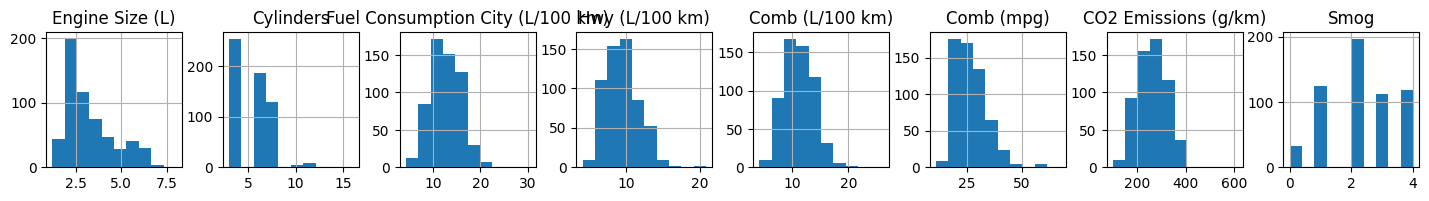

In [30]:
nearest_square = lambda number: np.power(np.round(np.sqrt(number)), 2)

int_columns = train.select_dtypes(include=(int, float))
sq = int(nearest_square(len(int_columns.columns)))

int_columns.hist(figsize=(20, 20), layout=(sq, sq))

clear_output()

Si nos fijamos en el historial de 'Model Year', vemos que todas las entradas al dataset tienen el mismo dato en esa columna.

Por tanto, concluimos que el año del modelo es irrelevante para la predicción del SMOG. En otras palabras, la ganancia de información de SMOG por MODEL YEAR es 0.

In [31]:
test_nolabel.columns

Index(['id', 'Model Year', 'Make', 'Model', 'Vehicle Class', 'Engine Size (L)',
       'Cylinders', 'Transmission', 'Fuel Type',
       'Fuel Consumption City (L/100 km)', 'Hwy (L/100 km)', 'Comb (L/100 km)',
       'Comb (mpg)', 'CO2 Emissions (g/km)'],
      dtype='object')

In [32]:
#quiero una tbala con los nombres de las columnas y los valores unicos de cada una
columns = train.columns
#Rango de valores de cada columna, excepto para las columnas con strings que pondremos unique e id no entra
ranges = {column: train[column].unique() if train[column].dtype == 'O' else [train[column].min(), train[column].max()] for column in columns if column != 'id'}

In [33]:
ranges

{'Make': array(['Mercedes-Benz', 'Mazda', 'Porsche', 'Aston Martin', 'Toyota',
        'Hyundai', 'GMC', 'Ford', 'BMW', 'Audi', 'Dodge', 'FIAT',
        'Alfa Romeo', 'Chevrolet', 'Land Rover', 'Kia', 'Infiniti',
        'Maserati', 'Lexus', 'Lamborghini', 'Jaguar', 'Cadillac', 'Ram',
        'Genesis', 'Jeep', 'Volvo', 'Honda', 'Lincoln', 'Acura',
        'Chrysler', 'MINI', 'Volkswagen', 'Bentley', 'Subaru', 'Buick',
        'Rolls-Royce', 'Nissan', 'Mitsubishi', 'Bugatti'], dtype=object),
 'Model': array(['A 250 4MATIC Hatch', 'Mazda3 5-Door', 'Panamera 4 ST', 'CX-3 4WD',
        'DBS V12', 'RAV4 AWD LE', 'Elantra', 'Corolla',
        'Yukon 4WD (No Stop-Start)', 'Transit Connect Wagon LWB FFV',
        'M235i xDrive Gran Coupe', 'SQ8 quattro', 'Sierra 4WD',
        'Charger AWD', 'Bronco Black Diamond 4WD', 'Ranger 4WD Tremor',
        'Mustang Convertible (High Performance)',
        'Yukon XL 4WD (No Stop-Start)', '500X AWD', 'Giulia Quadrifoglio',
        'Camaro ZL1', 'Kona', '

| Variables | Rango de valores | Definición |
| --- | --- | --- |
| {} | 1-10000 | Identificador de la muestra |
| ```
columns[1]``` | 2014 | Año del modelo |
quiero añadir [columns[1]] en la tabla de arriba para que se vea el nombre de la columna para ello 

In [34]:
train

,id,Make,Model,Vehicle Class,Engine Size (L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km),Smog
0,ab44e9bec15,Mercedes-Benz,A 250 4MATIC Hatch,Station wagon: Small,2.0,4,AM7,Z,10.0,7.0,8.7,32,202,2
1,45926762371,Mazda,Mazda3 5-Door,Mid-size,2.0,4,AS6,X,8.6,6.7,7.7,37,181,4
2,e9be56e153f,Porsche,Panamera 4 ST,Full-size,2.9,6,AM8,Z,12.8,10.2,11.7,24,274,2
3,077092760df,Mazda,CX-3 4WD,Compact,2.0,4,AS6,X,8.6,7.4,8.1,35,189,1
4,c1c2579b795,Aston Martin,DBS V12,Minicompact,5.2,12,A8,Z,16.4,10.7,13.8,20,324,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,4a15a420076,BMW,M8 Gran Coupe Competition,Mid-size,4.4,8,AS8,Z,16.1,11.0,13.8,20,322,1
582,1ff291b6f89,Dodge,Charger (MDS),Full-size,5.7,8,A8,X,14.7,9.4,12.3,23,289,1
583,ff3fb82f77b,Ram,1500 4X4 EcoDiesel,Pickup truck: Standard,3.0,6,A8,D,11.1,8.0,9.7,29,260,0
584,cf742d4b653,Honda,Accord Sport/Touring,Full-size,2.0,4,AS10,X,10.4,7.4,9.1,31,211,4


In [35]:
#CROSS VALIDATION
from sklearn.model_selection import train_test_split
#separo el dataset en train y te

#quiero que las columnas con string , dummiarlas

train = pd.get_dummies(train,columns=['Make','Model','Vehicle Class','Transmission','Fuel Type'],drop_first=True)



X = train.drop(['Smog','id'],axis=1)#elimi
y = train['Smog']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)#separo el dataset en train y test

#ahora quiero separar el train en train y validation

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)#separo el dataset en train y test

#mi modelo es un random forest
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=40, random_state=5)#he em

model.fit(X_train,y_train)

y_pred = model.predict(X_test)



In [36]:
#quiero que haya redondeo en los valores de y_pred
y_pred = np.round(y_pred)
#f1 score 
from sklearn.metrics import f1_score
f1_score(y_test,y_pred,average='macro')

0.5783017957652105

In [37]:
#quiero ver la matriz de confusion
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[ 1,  2,  0,  0,  0],
       [ 0, 16,  6,  1,  3],
       [ 0,  6, 29,  7,  1],
       [ 0,  0, 10, 12,  1],
       [ 0,  0,  3,  7, 13]], dtype=int64)

In [38]:
from sklearn.model_selection import cross_val_predict

predicciones = cross_val_predict(model,X,y,cv=10)
#cross validation es un metodo que se usa para evaluar la eficacia de un modelo, consiste en dividir el dataset en k partes en nuestro caso 5

In [39]:
predicciones = np.round(predicciones)

In [40]:
#estudio de las predicciones

#f1 score
f1_score(y,predicciones,average='macro')

0.6727457971577899

In [41]:
#quiero ver la matriz de confusion
confusion_matrix(y,predicciones)

array([[ 20,  12,   1,   0,   0],
       [  1,  72,  40,   6,   6],
       [  0,  10, 147,  31,   9],
       [  0,   0,  28,  76,   8],
       [  0,   0,  11,  34,  74]], dtype=int64)

In [ ]:
grid_search.best_params_

#tarda mucho elm grid search ya que tiene que probar todas las combinaciones posibles pero son 5 parametros y 5 valores por parametro

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 100}

In [ ]:
#ahora quiero hacer un modelo con los mejores parametros

model = RandomForestRegressor(n_estimators=50, random_state=80)#n
#cros validation
predicciones = cross_val_predict(model,X,y,cv=10)

In [ ]:
#f1 score
predicciones = np.round(predicciones)
f1_score(y,predicciones,average='macro')

0.664696122247314

In [ ]:
#ahora quiero ver el f1 score
y_pred = model.predict(X_test)

y_pred = np.round(y_pred)

f1_score(y_test,y_pred,average='macro')

0.10683229813664596

In [ ]:
#modelos geometricos

from sklearn.ensemble import GradientBoostingRegressor
#otros modelos geometricos son xgboost y lightgbm

#xgboost es un modelo geometrico que se basa en gradient boosting
#para usarlo importamos xgboost
import xgboost as xgb#pip install xgboost
import lightgbm as lgb#pip install lightgbm
modelo = xgb.XGBRegressor()
modelo = lgb.LGBMRegressor()
#dentro de lgb hay dos modelos, lgbm y lgbmregressor, lgbm es para clasificacion y lgbmregressor es para regresion
#lgbm clasificacion lo utilizamos defini9endo:
modelo = xgb.XGBModel()


#model = GradientBoostingRegressor(n_estimators=50, random_state=80)#n
#cros validation
predicciones = cross_val_predict(model,X,y,cv=10)

#f1 score
predicciones = np.round(predicciones)
f1_score(y,predicciones,average='macro')

0.29765571420348175

In [ ]:
#arboles de decision pueden ser: random forest, gradient boosting, xgboost, lightgbm
model = RandomForestRegressor(n_estimators=50, random_state=80)

#gradient boosting
from sklearn.ensemble import GradientBoostingRegressor
#model = GradientBoostingRegressor(n_estimators=50, random_state=80)

predicciones = cross_val_predict(model,X,y,cv=10)

#f1 score
predicciones = np.round(predicciones)
f1_score(y,predicciones,average='macro')


0.664696122247314

In [ ]:
'''Tenemos que usar random forest cuando'''

In [ ]:
#clasificador KNN
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

predicciones = cross_val_predict(model,X.values,y.values,cv=10)

#f1 score

f1_score(y,predicciones,average='macro')


0.5785388428292467

In [ ]:
model = KNeighborsClassifier(n_neighbors=5)
predicciones = cross_val_predict(model,X.values,y.values,cv=10)
predicciones
f1_score(y,predicciones,average='macro')

0.5077506473112047

In [ ]:
X

,Engine Size (L),Cylinders,Fuel Consumption City (L/100 km),Hwy (L/100 km),Comb (L/100 km),Comb (mpg),CO2 Emissions (g/km),Make_Alfa Romeo,Make_Aston Martin,Make_Audi,...,Transmission_AV10,Transmission_AV6,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_E,Fuel Type_X,Fuel Type_Z
0,2.0,4,10.0,7.0,8.7,32,202,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2.0,4,8.6,6.7,7.7,37,181,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2.9,6,12.8,10.2,11.7,24,274,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2.0,4,8.6,7.4,8.1,35,189,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5.2,12,16.4,10.7,13.8,20,324,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,4.4,8,16.1,11.0,13.8,20,322,0,0,0,...,0,0,0,0,0,0,0,0,0,1
582,5.7,8,14.7,9.4,12.3,23,289,0,0,0,...,0,0,0,0,0,0,0,0,1,0
583,3.0,6,11.1,8.0,9.7,29,260,0,0,0,...,0,0,0,0,0,0,0,0,0,0
584,2.0,4,10.4,7.4,9.1,31,211,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
#f1 score
predicciones = model.predict(X_test)
predicciones = np.round(predicciones)
f1_score(y_test,predicciones,average='macro')

AttributeError: 'Flags' object has no attribute 'c_contiguous'

In [ ]:
#SVM
from sklearn.svm import SVC
model = SVC(kernel='linear',C=2)

#X era


predicciones = cross_val_predict(model,X.values,y.values,cv=10)
f1_score(y,predicciones,average='macro')

0.7724490903484428

In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear']
}

grid_search = GridSearchCV(estimator = model, param_grid = param_grid)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(C=5, kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear']})

In [ ]:
grid_search.best_params_

{'C': 1, 'kernel': 'linear'}

In [ ]:
#gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model = GaussianNB(var_smoothing=1e-09, priors=None)
predicciones = cross_val_predict(model,X,y,cv=10)
f1_score(y,predicciones,average='macro')


0.5335440352830945

In [ ]:
#red neuronal
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(100,100,100),max_iter=500)
predicciones = cross_val_predict(model,X,y,cv=10)
f1_score(y,predicciones,average='macro')

0.6353783341453083

In [44]:
test_nolabel = pd.get_dummies(test_nolabel,columns=['Make','Model','Vehicle Class','Transmission','Fuel Type'],drop_first=True)


In [45]:
X_test = test_nolabel.drop(['id'],axis=1)

In [46]:
X_test = X_test.drop(['Model Year'],axis=1)

In [47]:
train = pd.get_dummies(train,columns=['Make','Model','Vehicle Class','Transmission','Fuel Type'],drop_first=True)



X = train.drop(['Smog','id','Model Year'],axis=1)#elimi
y = train['Smog']

In [48]:
y

0      2
1      4
2      2
3      1
4      1
      ..
581    1
582    1
583    0
584    4
585    1
Name: Smog, Length: 586, dtype: int64

In [49]:
len(X.columns)

570

In [50]:
#quiero que X y X_test tengan las mismas columnas, y sino eliminar las columnas que no estan en X_test

#sacar las columna que estan en X y no en X_test
columnas = X.columns
columnas_test = X_test.columns
columnas_no_comunes = [columna for columna in columnas if columna not in columnas_test]
X = X.drop(columnas_no_comunes,axis=1)

In [51]:
#sacar las columna que estan en X_test y no en X
columnas = X.columns
columnas_test = X_test.columns
columnas_no_comunes = [columna for columna in columnas_test if columna not in columnas]
X_test = X_test.drop(columnas_no_comunes,axis=1)

In [52]:
#quiero que se me descarga un csv con las predicciones de test_nolabel

model = RandomForestRegressor(n_estimators=50, random_state=80)
model.fit(X,y)
y_pred = model.predict(X_test)

In [53]:
y_pred = np.round(y_pred)
y_pred

array([2., 0., 2., 2., 2., 2., 3., 2., 0., 3., 1., 2., 2., 3., 1., 3., 1.,
       2., 2., 3., 2., 2., 2., 2., 4., 3., 3., 2., 3., 2., 2., 2., 1., 1.,
       2., 4., 4., 3., 2., 3., 2., 2., 3., 0., 4., 2., 1., 2., 3., 2., 3.,
       3., 1., 3., 2., 3., 3., 1., 3., 3., 1., 3., 2., 0., 3., 1., 2., 4.,
       3., 4., 3., 4., 4., 1., 2., 2., 1., 1., 3., 4., 4., 0., 3., 1., 2.,
       3., 0., 2., 2., 4., 3., 4., 3., 2., 3., 1., 2., 2., 2., 1., 2., 4.,
       2., 3., 3., 4., 2., 1., 2., 2., 3., 0., 4., 3., 1., 1., 3., 1., 2.,
       1., 4., 4., 4., 3., 3., 4., 2., 3., 3., 4., 4., 3., 0., 0., 0., 4.,
       2., 3., 3., 3., 3., 2., 2., 2., 1., 3., 2., 2., 3., 4., 3., 3., 3.,
       2., 3., 2., 2., 2., 3., 2., 4., 1., 1., 3., 4., 3., 1., 3., 1., 1.,
       4., 3., 2., 4., 2., 3., 3., 3., 3., 1., 4., 4., 4., 1., 0., 3., 2.,
       1., 2., 2., 3., 2., 3., 3., 0., 2., 2., 3., 0., 1., 2., 3., 2., 2.,
       2., 1., 2., 2., 3., 4., 3., 2., 1., 3., 2., 1., 2., 4., 1., 2., 2.,
       3., 1., 2., 3., 1.

In [54]:
#dos columnas id y y_pred
y_pred = pd.DataFrame({'id':test_nolabel['id'],'Predicted':y_pred})

In [55]:
#pasar a int la columna predicted
y_pred['Predicted'] = y_pred['Predicted'].astype(int)

In [56]:
#csv
y_pred.to_csv('submission_1.csv',index=False)

In [57]:
y_pred

,id,Predicted
0,2be023f9102,2
1,a320ba7de7b,0
2,2879e8fa078,2
3,a561b6ee65b,2
4,94c225dd8e9,2
...,...,...
385,57e82961151,3
386,cb37ae8f0fd,0
387,6da7a57b43b,2
388,634dd375b56,2


In [58]:
y_pred.index = test_nolabel['id']
#columna de 0 sea predicted
y_pred.columns = ['Predicted']

ValueError: Length mismatch: Expected axis has 2 elements, new values have 1 elements

In [ ]:
y_pred

,Predicted
id,
2be023f9102,2.0
a320ba7de7b,0.0
2879e8fa078,2.0
a561b6ee65b,2.0
94c225dd8e9,2.0
...,...
57e82961151,3.0
cb37ae8f0fd,0.0
6da7a57b43b,2.0


In [59]:
#pipeline
from sklearn.pipeline import Pipeline   
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer


#quiero predecir con pipeline
#quiero hacer un pipeline con random forest
pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('model',RandomForestRegressor(n_estimators=50, random_state=80))
])

pipeline.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 RandomForestRegressor(n_estimators=50, random_state=80))])

In [60]:
#f1 score con pipeline
predicciones = cross_val_predict(pipeline,X,y,cv=10)
predicciones = np.round(predicciones)
f1_score(y,predicciones,average='macro')

0.6631777305739244